In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [39]:
#Imprt data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [40]:
#Setting x and y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [41]:
#Mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

#Total number of values
n = len(x)

#Using the formula to calculate b1 and b
numer = 0 #(x-mean_x)(y-mean_y)
denom = 0 #(x-mean_x)**2

for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i]-mean_x)**2
m = numer/denom   
c = mean_y - (m * mean_x)
    
#print co-efficciets

print("m - ",m, " c - ", c)
    

m -  0.26342933948939945  c -  325.57342104944223


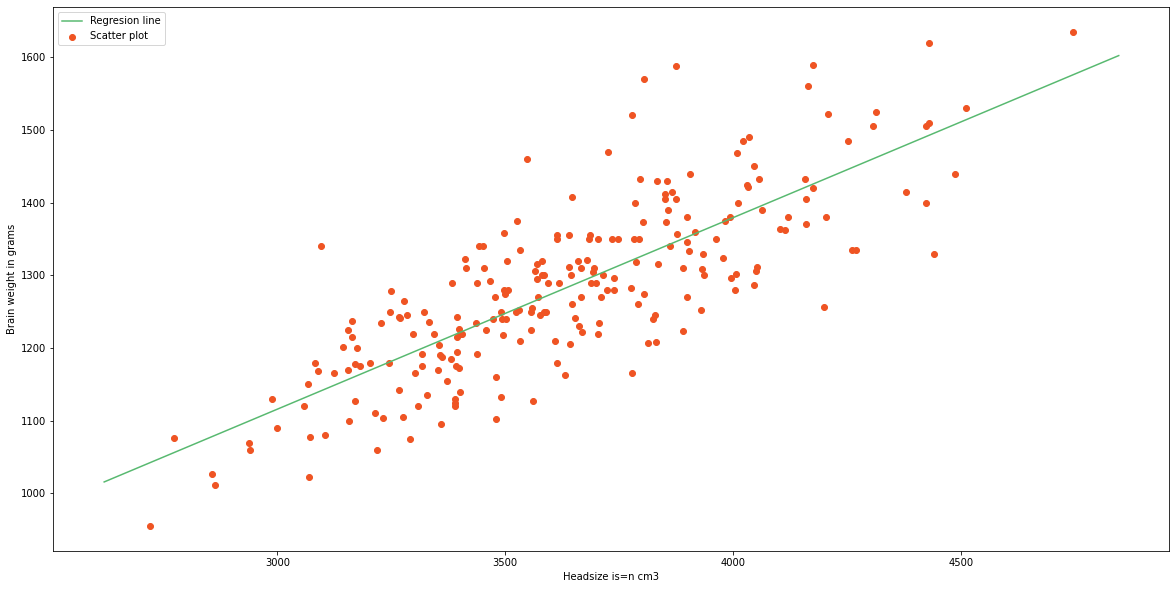

In [42]:
#Plotting values in a regression line 

max_x = np.max(x) + 100
min_x = np.min(x) - 100

#Calculating values of x and y
X = np.linspace(min_x, max_x, 1000)
Y =  c + m*X

#plotting the line
plt.plot(X, Y, color = '#58b970', label='Regresion line') #line
#plotting scatter points
plt.scatter(x, y, c='#ef5423', label='Scatter plot') #Initial values

plt.xlabel("Headsize is=n cm3")
plt.ylabel("Brain weight in grams")
plt.legend()
plt.show()

In [43]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = m*x[i] + c
    ss_t += (y[i] - mean_y)**2
    ss_r += (y[i] - y_pred) **2
r2 = 1 - (ss_r/ss_t)
print(r2)
    


0.6393117199570003


In [45]:
#Using skicit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#We cannot use matrix of rank 1 in sklearn
x = x.reshape(n,1)
#creating model
reg = LinearRegression()
#Fit training data
model = reg.fit(x,y)
#Predict y
y_pred = model.predict(x)
#Calculate r score
r2_score = model.score(x,y)
print(r2_score)

0.639311719957
